In [656]:
import numpy as np
import matplotlib.pyplot as plt

In [658]:
def plot(data):
    fig, ax = plt.subplots()
    ax.axis('off')
    table = ax.table(cellText = data, loc = 'center')
    table.auto_set_font_size(True)
    # table.set_fontsize(12)
    table.scale(1, 2) 

In [661]:
reward = -1
action_names = {
    "UP" : (-1, 0),
    "DOWN" :(1, 0),
    "RIGHT" : (0, 1),
    "LEFT" : (0, -1),
}

In [675]:
def summ(row, col, data, actions, reward):
    
    states = []
    for a in actions:
        st = [row, col] + a
        a, b = st
        if 0<=a<5 and 0<=b<5:
            st = (a, b)
        else:
            st = (row, col)
        states.append(st)
    return sum(reward + data[s] for s in states)
    

In [686]:
def policy_evaluation(policy, data,reward, action_names):
    data1 = np.zeros((5, 5))
    for row in range(5):
        for col in range(5):
            if (row == 0 and col ==0) or (row == 4 and col == 4):
                continue
            policyCell = policy[row][col].split()
            if policyCell == ["ALL"]:
                actions = np.array(list(action_names.values()))
            else:
                actions = np.array([action_names[p] for p in policyCell])
            probability = round(1/len(actions), 2)
            data1[row, col] =  round(probability * (summ(row, col, data, actions, reward)), 1)
            
    plot(data1)
    return data1

In [688]:
def policy_improvement(data, action_names): 
    data2 = np.zeros((5, 5)).tolist()
    actions = np.array(list(action_names.values()))
    for row in range(5):
        for col in range(5):
            diff = []
            key = ""
            if (row == 0 and col ==0) or (row == 4 and col == 4):
                    continue
            states = []
            for a in actions:
                st = [row, col] + a
                a, b = st
                if 0<=a<5 and 0<=b<5:
                    states.append((a,b))
                else:
                    states.append((row, col))
            for i, s in enumerate(states):
                diff.append(data[row, col] - data[s])
            m = np.min(diff)
            a = 0
            for i, d in enumerate(diff):
                if d == m:
                    a += 1
                    if a==len(states):
                        key = "ALL"
                        continue
                    min_state = tuple(np.array(states[i]) - (row, col))
                    key += "".join(list((filter(lambda key: action_names[key] == min_state, action_names)))) + " "
            data2[row][col] = key
    plot(data2)
    return data2

In [690]:
def policy_iteration(data, reward, action_names):
    data = np.zeros((5, 5))
    policy = policy_improvement(data, action_names)
    converged = False
    a = 0
    while not converged:
        
        data = policy_evaluation(policy, data, reward, action_names)
        new_policy = policy_improvement(data, action_names)
        if new_policy == policy:
            converged = True
        policy = new_policy
        a += 1
    print("Total Iterations = ", a)

Total Iterations =  5


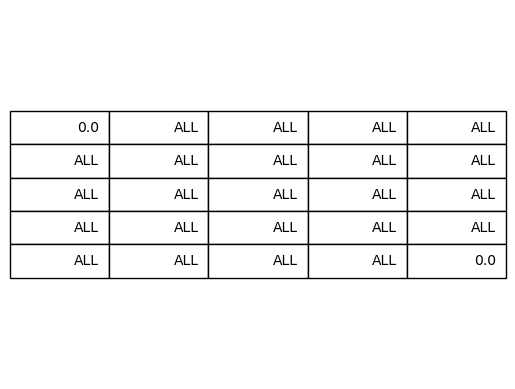

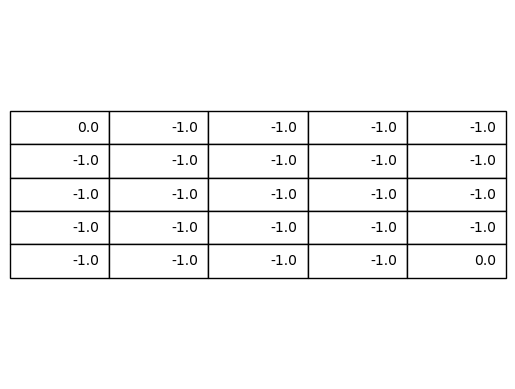

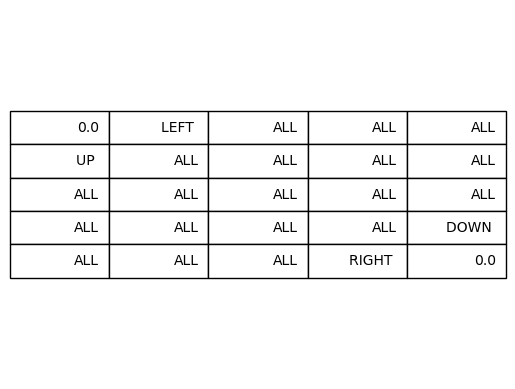

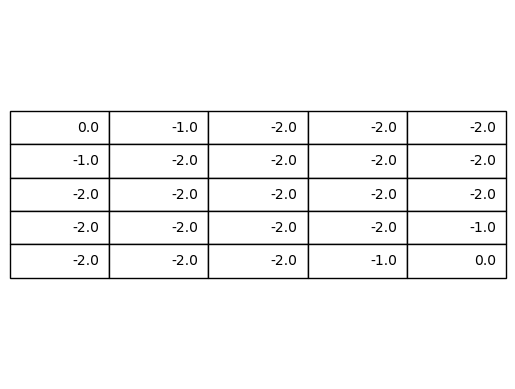

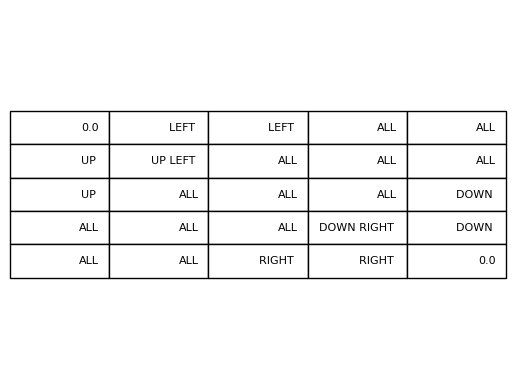

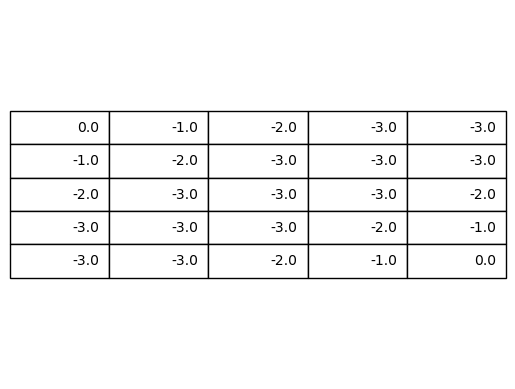

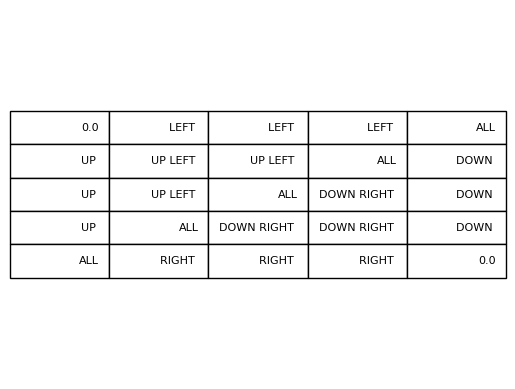

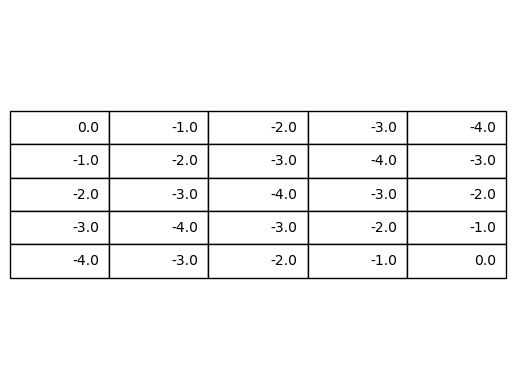

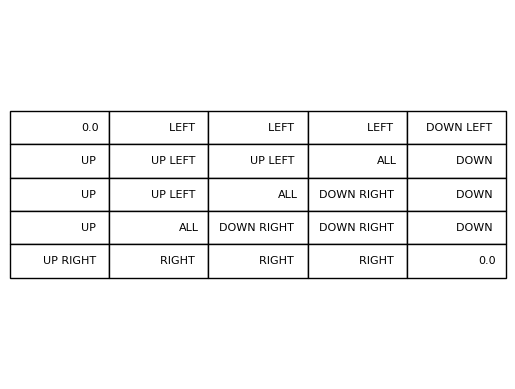

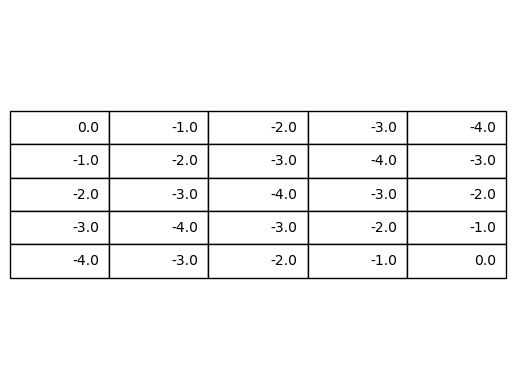

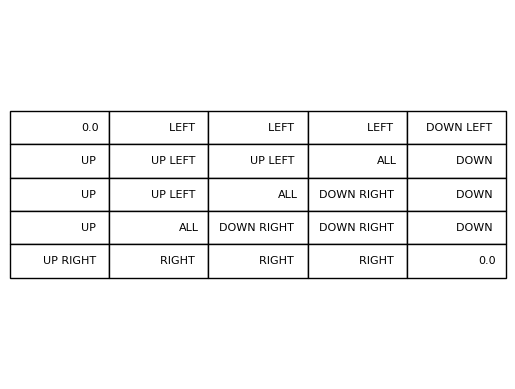

In [692]:
policy_iteration(data, reward, action_names)